In [15]:
# Import Dependencies
import os
import pandas as pd
import requests
import json
import pprint
import matplotlib.pyplot as plt
import numpy as np
from config import (aqs_api_key)
from config import (email_address)

# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
sample_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
Hawaii = "15"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"

cali_data = []
hawaii_data = []
ny_data = []
dc_data = []
mass_data = []

In [16]:
# Create a DataFrame for California and pull carbon monoxide data from API
cali_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20190101", "edate" : "20190801", "state" : California}

# Call to url
cali_response = requests.get(sample_data_url, params = cali_params).json()
cali_data.append(cali_response)

cali_df = pd.DataFrame(cali_data[0]["Data"])
cali_df.head()


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24
1,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24
2,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24
3,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24
4,06,073,1014,88502,1,32.57816,-116.92135,NAD83,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,733,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,Donovan,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,41740,"San Diego-Carlsbad, CA",2020-03-24


In [17]:
clean_cali_df=cali_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)
clean_cali_df

,state_code,county_code,site_number,latitude,longitude,parameter,sample_duration,pollutant_standard,date_local,units_of_measure,...,first_max_value,first_max_hour,aqi,method,site_address,state,county,city,cbsa,date_of_last_change
0,06,073,1014,32.578160,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2019-01-01,Micrograms/cubic meter (LC),...,14.6,22,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-03-24
1,06,073,1014,32.578160,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2019-01-01,Micrograms/cubic meter (LC),...,5.8,23,24.0,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-03-24
2,06,073,1014,32.578160,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2019-01-02,Micrograms/cubic meter (LC),...,31.8,20,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-03-24
3,06,073,1014,32.578160,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,None,2019-01-02,Micrograms/cubic meter (LC),...,9.6,23,40.0,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-03-24
4,06,073,1014,32.578160,-116.921350,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,None,2019-01-03,Micrograms/cubic meter (LC),...,23.3,23,NaN,Met-One BAM W/PM2.5 VSCC - Beta Attenuation,"480 ALTA RD, OTAY MESA, CA",California,San Diego,Otay Mesa,"San Diego-Carlsbad, CA",2020-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17123,06,083,9000,34.733889,-120.008349,Acceptable PM2.5 AQI & Speciation Mass,24 HOUR,None,2019-07-17,Micrograms/cubic meter (LC),...,4.9,0,20.0,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,San Rafael,California,Santa Barbara,Not in a city,"Santa Maria-Santa Barbara, CA",2020-08-04
17124,06,083,9000,34.733889,-120.008349,Acceptable PM2.5 AQI & Speciation Mass,24 HOUR,None,2019-07-20,Micrograms/cubic meter (LC),...,3.3,0,14.0,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,San Rafael,California,Santa Barbara,Not in a city,"Santa Maria-Santa Barbara, CA",2020-08-04
17125,06,083,9000,34.733889,-120.008349,Acceptable PM2.5 AQI & Speciation Mass,24 HOUR,None,2019-07-23,Micrograms/cubic meter (LC),...,3.4,0,14.0,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,San Rafael,California,Santa Barbara,Not in a city,"Santa Maria-Santa Barbara, CA",2020-08-04
17126,06,083,9000,34.733889,-120.008349,Acceptable PM2.5 AQI & Speciation Mass,24 HOUR,None,2019-07-26,Micrograms/cubic meter (LC),...,2.8,0,12.0,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,San Rafael,California,Santa Barbara,Not in a city,"Santa Maria-Santa Barbara, CA",2020-08-04


In [18]:
clean_cali_df.isnull().values.any()

True

In [19]:
# Filter out the 1-hour sample_duration and fix any null values


# Groupby date and fix null values
group_cali = pd.DataFrame(clean_cali_df.groupby(['date_local', 'county'])["aqi"].mean().unstack())

# Convert the date_local in the index into 'datetime' format
#group_cali.index = pd.to_datetime(group_cali.index)
print(group_cali.index)
# Average out data on a per month basis
group_cali.index = pd.to_datetime(group_cali.index)
cali_monthly = group_cali.resample('M').mean()
cali_monthly.head()


#average data by months

Index(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
       '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
       ...
       '2019-07-23', '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-27',
       '2019-07-28', '2019-07-29', '2019-07-30', '2019-07-31', '2019-08-01'],
      dtype='object', name='date_local', length=213)


county,Butte,Colusa,Del Norte,El Dorado,Fresno,Glenn,Imperial,Inyo,Kern,Los Angeles,...,San Diego,San Joaquin,Santa Barbara,Shasta,Siskiyou,Stanislaus,Sutter,Trinity,Tulare,Yolo
date_local,,,,,,,,,,,,,,,,,,,,,
2019-01-31,36.604839,33.387097,10.555556,9.500000,25.849462,27.580645,53.241935,5.400000,54.322581,35.206452,...,32.793011,40.233333,5.571429,8.0,5.333333,51.2,52.032258,24.647059,56.892473,41.129032
2019-02-28,19.244048,13.678571,4.333333,4.888889,11.030864,14.892857,38.017857,4.777778,20.630952,28.121429,...,23.613095,25.444444,6.625000,3.0,3.000000,21.6,26.043478,3.625000,21.985119,17.250000
2019-03-31,19.790323,13.000000,9.600000,7.863636,12.244444,17.730769,25.537037,8.272727,22.349462,28.939785,...,25.612903,21.269231,9.900000,4.3,3.777778,24.8,19.741935,5.400000,26.395161,15.071429
2019-04-30,24.727778,20.433333,17.900000,6.700000,14.346154,21.266667,28.966667,8.000000,21.266667,37.565556,...,29.286111,19.766667,11.777778,5.5,9.400000,21.4,23.133333,5.029412,36.069444,21.925926
2019-05-31,23.223118,22.387097,9.111111,10.850000,19.956989,22.290323,32.306452,11.600000,26.532258,36.668817,...,26.588710,20.709677,15.000000,9.6,10.400000,22.6,20.653846,15.423077,36.336022,19.068966


In [20]:
#The file was too much data for more of the graphes to show somehting coherant so i wanted to the top producers 
big_ones=clean_cali_df.nlargest(10, ["aqi"]) 
big_ones_group=pd.DataFrame(big_ones.groupby(['date_local', 'county'])["aqi"].mean().unstack()) 
big_ones_group.head()

county,Imperial,Kern,Los Angeles,Plumas,Riverside,San Bernardino,Tulare
date_local,,,,,,,
2019-01-11,143.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-27,NaN,144.0,NaN,138.0,NaN,NaN,132.0
2019-01-29,NaN,139.0,NaN,NaN,NaN,NaN,138.0
2019-07-05,NaN,NaN,161.0,NaN,152.0,169.0,NaN


In [21]:
cali_random=group_cali.sample(n=10, frac=None, replace=False, weights=None, random_state=None, axis=1)
print (cali_random)

county      Los Angeles  Marin  Sacramento  Del Norte     Tulare  Sutter  \
date_local                                                                 
2019-01-01    28.400000    NaN   16.000000        NaN  94.000000    28.0   
2019-01-02    31.600000    NaN   82.500000        NaN  79.000000    74.0   
2019-01-03    33.400000    NaN   95.666667       14.0  81.666667    89.0   
2019-01-04    50.000000    NaN  105.000000        NaN  79.500000   103.0   
2019-01-05    55.600000    NaN   67.500000        NaN  45.500000    67.0   
...                 ...    ...         ...        ...        ...     ...   
2019-07-28    54.400000    NaN   38.500000       31.0  53.000000    52.0   
2019-07-29    52.333333   42.0   53.500000       30.0  37.500000    52.0   
2019-07-30    62.800000    NaN   31.000000       21.0  46.000000    38.0   
2019-07-31    61.000000    NaN   34.000000       12.0  42.500000    41.0   
2019-08-01    44.000000    8.0   18.000000        6.0  39.333333    33.0   

county     

In [22]:
cali_merge_df =pd.concat([big_ones_group, cali_random]) 
cali_merge_df.head()

,Imperial,Kern,Los Angeles,Plumas,Riverside,San Bernardino,Tulare,Marin,Sacramento,Del Norte,Sutter,Butte,San Joaquin
date_local,,,,,,,,,,,,,
2019-01-11,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-27,NaN,144.0,NaN,138.0,NaN,NaN,132.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-29,NaN,139.0,NaN,NaN,NaN,NaN,138.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-05,NaN,NaN,161.0,NaN,152.0,169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:00:00,NaN,95.0,28.4,NaN,NaN,NaN,94.0,NaN,16.0,NaN,28.0,37.5,18.0


In [8]:
#sample_duration = clean_cali_df["sample_duration"] == '8-HR RUN AVG END HOUR'
#clean2_cali_df = clean_cali_df[sample_duration]
#print (clean2_cali_df)

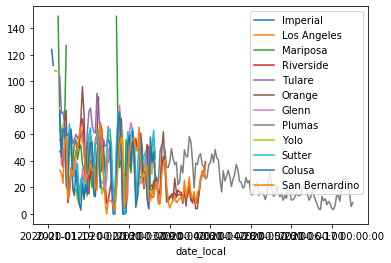

In [42]:
cali_merge_df.plot()

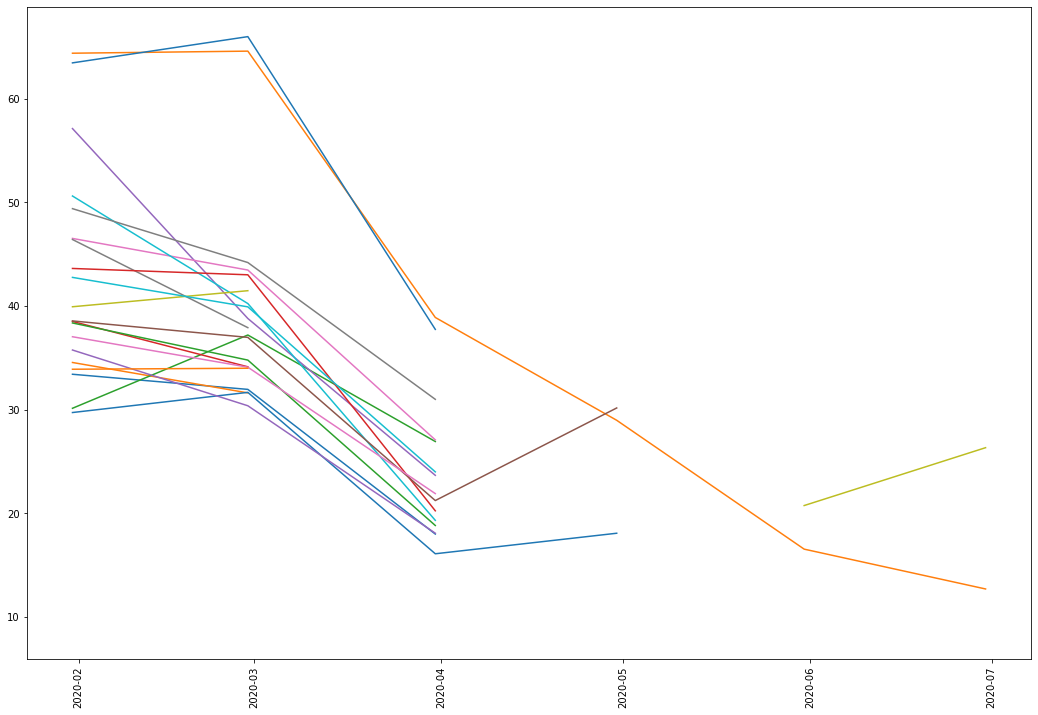

In [56]:
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = cali_monthly.index
y_values = cali_monthly
plt.plot(x_values,y_values)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

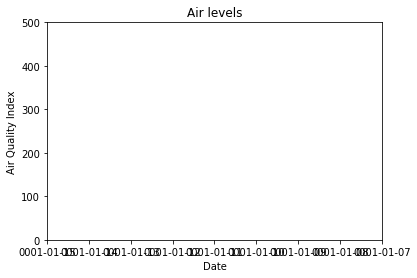

In [23]:
x_axis = cali_monthly.index

plt.title("Air levels")
plt.xlabel("Date")
plt.ylabel("Air Quality Index")

plt.xlim(15.00, len(cali_monthly)-1)
plt.ylim(0, 500)

plt.bar(x_axis, (cali_merge_df), facecolor="red", alpha=0.75, align="center")
plt.show()

In [10]:
fig, ax = plt.subplots(figsize=(18,12))
x_values = cali_monthly.index
y_values = cali_monthly
plt.scatter(x_values, y_values, color ='k', s=100 )
plt.xlabel("Date")
plt.ylabel('"Air Quality Index')
plt.show()

NameError: name 'plt' is not defined

In [24]:
x_axis = cali_monthly.index
x_lim = cali_monthly_df
y_axis= cali_monthly_df

plt.title("Sin from 0 to 2$\pi$")
plt.xlabel("monthly dates")
plt.ylabel("sin(x)")

#plt.hlines(0, 0, x_lim, alpha=0.2)
#plt.xlim(0, clean_cali_df["aqi"].max())
#plt.ylim(-1, 1)

plt.plot_date(x_axis, y_axis, marker="o", color="red", linewidth=1)
plt.show()

NameError: name 'cali_monthly_df' is not defined

In [25]:
x_axis = np.arange(cali_monthly.min(), cali_monthly.max(), 10 )
sin = np.sin(x_axis)
cos = np.cos(x_axis)

plt.hlines(0, 0, 10, alpha=0.25)
plt.plot(x_axis, sin, linewidth=0, marker="o", color="blue")
plt.plot(x_axis, cos, linewidth=0, marker="^", color="red")
plt.xlim(0, cali_monthly.max())
plt.ylim(-1, 1)
plt.grid()
plt.show()




ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().